# Maximizing E-commerce Revenue: Prioritization and Analysis of Marketing Hyphotheses through A/B Testing
<br>
<br>
The analysis conducted in this project is to prioritize hypotheses, conduct and launch A/B test and analyse the results for a big online store. The overall objective is to assist the marketing department boost revenue.

# Table of Contents

- [Description of the data](#description) <br>
- [Data Inspections](#inspect) <br>
- [Data Preprocessing](#processing) <br>
- [Part 1. Prioritizing Hypotheses](#hypothesis) <br>
- [Part 2. A/B Test Analysis](#analysis)

## Description of the data <br>
<div id='decription'></div>

Hypothesis Table:
- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

Orders Table:
- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to
 
Visits Table:
- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified

In [1]:
#importing libraries  
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

In [2]:
#importing data
try:
    hypothesis = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/MakingBusinessDecisionsBasedOnData/hypotheses_us.csv',sep=';')
    orders = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/MakingBusinessDecisionsBasedOnData/orders_us.csv',sep=',')
    visits = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/MakingBusinessDecisionsBasedOnData/visits_us.csv',sep=',')
except:
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv',sep=',')
    visits = pd.read_csv('/datasets/visits_us.csv',sep=',')

## Data Inspections
<div id='inspect'></div>

In [3]:
#inspecting hypothesis table 
hypothesis.info()
print(f'Missing values in hypothesis table {hypothesis.isna().sum()}')
print(f'Duplicated values in hypothesis tabele {hypothesis.duplicated().sum()}')
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Missing values in hypothesis table Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64
Duplicated values in hypothesis tabele 0


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
#changing hypothesis column names to lower case
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

In [5]:
#inspecting orders table 
orders.info()
print(f'Missing values in orders table {orders.isna().sum()}')
print(f'Duplicated values in orders tabele {orders.duplicated().sum()}')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
Missing values in orders table transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Duplicated values in orders tabele 0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
#changing date column in orders table to datetime type 
orders['date'] = pd.to_datetime(orders["date"], format="%Y-%m-%d")

In [7]:
#inspecting visits table 
visits.info()
print(f'Missing values in visits table {visits.isna().sum()}')
print(f'Duplicated values in visits tabele {visits.duplicated().sum()}')
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Missing values in visits table date      0
group     0
visits    0
dtype: int64
Duplicated values in visits tabele 0


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
#Changing date column in visits table to datetime type
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

## Data Preprocessing
<div id='processing'></div>

In [9]:
#checking if users are in both groups in the orders table
dups = orders[(orders['visitorId'].isin(orders[orders['group']=='A']['visitorId'])) & (orders['visitorId'].isin(orders[orders['group']=='B']['visitorId']))]
dups

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
20,2904772834,963407295,2019-08-15,5.6,B
23,4252514150,351125977,2019-08-15,235.6,B
24,1162046357,3234906277,2019-08-15,120.2,B
26,2223239646,199603092,2019-08-15,55.7,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,20.8,B
1183,1458356232,963407295,2019-08-14,80.0,A
1184,1329499668,2949041841,2019-08-14,160.7,B
1189,4082620617,393266494,2019-08-14,490.4,B


In [10]:
#removing duplicated group visitors
orders = orders.drop(orders[orders['visitorId'].isin(dups['visitorId'])].index)
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


# Part 1. Prioritizing Hypotheses
<div id='hypothesis'></div>

In [11]:
#calculating ICE in hypothesis table
hypothesis['ice']= (hypothesis['impact']*hypothesis['confidence'])/hypothesis['effort']
hypothesis.sort_values(by='ice',ascending=False,inplace=True)
icehyp = hypothesis[['hypothesis','ice']]
icehyp

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [12]:
#calculating RICE in hypothesis table 
hypothesis['rice']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['effort']
hypothesis.sort_values(by='rice',ascending=False,inplace=True)
ricehyp = hypothesis[['hypothesis','rice']]
ricehyp

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [13]:
#changing priorites between ICE and RICE
prio = pd.concat([icehyp,ricehyp])
prio

,hypothesis,ice,rice
8,Launch a promotion that gives users discounts ...,16.200000,NaN
0,Add two new channels for attracting traffic. T...,13.333333,NaN
7,Add a subscription form to all the main pages....,11.200000,NaN
6,Show banners with current offers and sales on ...,8.000000,NaN
2,Add product recommendation blocks to the store...,7.000000,NaN
1,Launch your own delivery service. This will sh...,2.000000,NaN
5,Add a customer review page. This will increase...,1.333333,NaN
3,Change the category structure. This will incre...,1.125000,NaN
4,Change the background color on the main page. ...,1.000000,NaN
7,Add a subscription form to all the main pages....,NaN,112.0


Comment:

Using the ICE metric the top 3 hypotheses are: 
- Launching a promotion that gives users discounts on their birthdays.
- Adding two new channels for attracting traffic. This will bring 30% more users.
- Adding a subscription form to all the main pages. This will help complile a mailing list.

Using the RICE metric the top 3 hypotheses are:
- Adding a subscription form to all the main pages. This will help complile a mailing list.
- Adding product recommendation blocks to the store's site. This will increase conversion and average purchase size/
- Adding two new channels for attracting traffic. This will bring 30% more users.

The bottom 4 hypotheses for both metrics are the same, though they are not in the same order for each metric priority. This clearly shows the worst performing hypotheses.

It is seen that the best performing hypotheses for both metrics is the effort is less than or equal to 6 and the impact and confidence is higher than 7 and for rice a higher reach will increase the rice score.

# Part 2. A/B Test Analysis 
<div id='analysis'></div>

In [14]:
#creating dates group and dropping any duplicates
datesGroups = orders[['date','group']].drop_duplicates()

#summing the revenue on the orders table as a cumulative aggregate
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'],orders['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'transactionId' : pd.Series.nunique,
            'visitorId' : pd.Series.nunique,
            'revenue' : 'sum'
        }
    ),
    axis=1
).sort_values(by=['date','group'])


#summing the visitors on the visits table as a cumulative aggregate
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'],visits['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visits' : 'sum'
        }
    ),
    axis=1
).sort_values(by=['date','group'])

#merging the two aggregate tables together and naming the columns
cumulativeTable = ordersAggregated.merge(
    visitsAggregated, left_on=['date','group'],right_on=['date','group']
)
cumulativeTable.columns = ['date','group','orders','buyers','revenue','visits']

cumulativeTable.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


1. Graphing cumulative revenue by group.

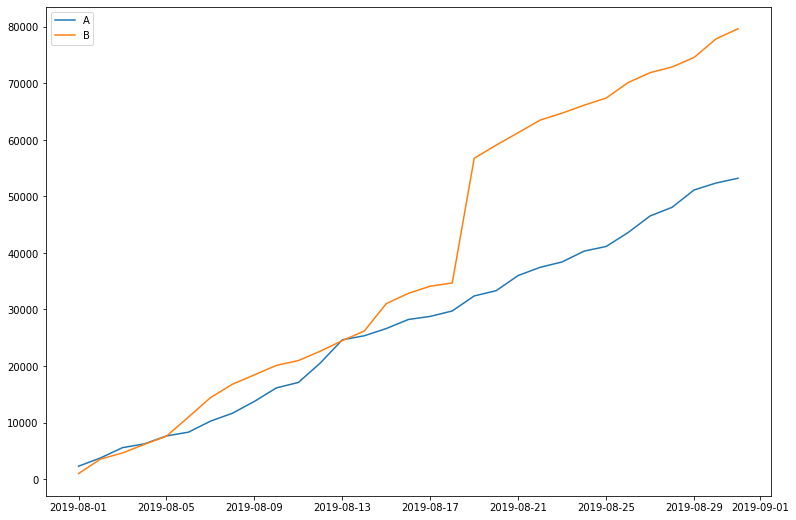

In [15]:
#creating table with cumulative orders and revenue for group A
cumulativeRevenueA = cumulativeTable[cumulativeTable['group']=='A'][['date','revenue','orders']]

#creating table with cumulative orders and revenue for group B
cumulativeRevenueB = cumulativeTable[cumulativeTable['group']=='B'][['date','revenue','orders']]

plt.figure(figsize=(13,9))

#plotting group A revenue graph
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'],label='A')

#plotting group B revenue graph
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'],label='B')

plt.legend()
plt.show()

Comment:

Observing the cumulative revenue graph above it is observed that product A performs better than product B from 2019-08-01 to 2019-08-05 then from there product B out performs product A only equalling in performance in 2019-08-13 but then exceptionally performing better from 2019-08-17. It is concluded that product B out peforms product A.

2. Graphing cumulative average order size by group.

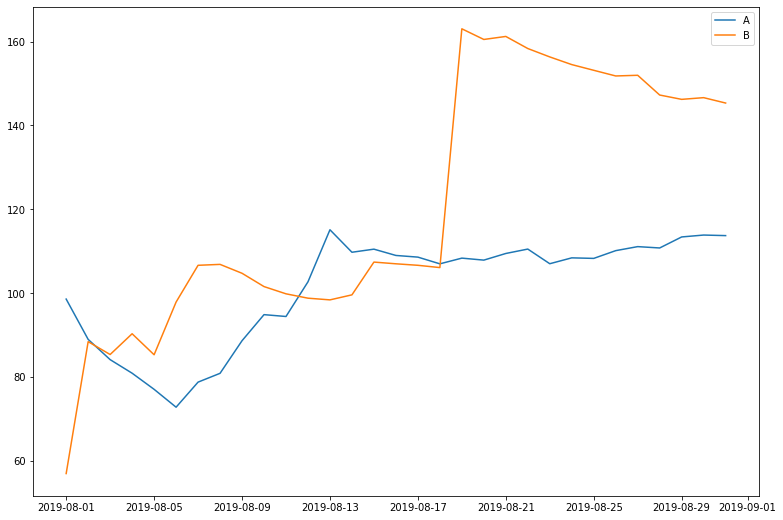

In [16]:
plt.figure(figsize=(13,9))
#plotting group A and calculating average size
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],label='A')

#plotting group A and calculating average size
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],label='B')

plt.legend()
plt.show()

Comment:

The average purchase size of product A is initially larger than that of product B. Product B's average purchase size then passes that of A for roughly 10 days then briefly product A average purchase size is larger than that of product B. Lastly product B's average purchase size spikes and out performs that of product B until the end of the test.

3. Graphing the relative difference in cumulative average order size for group B compared with group A.

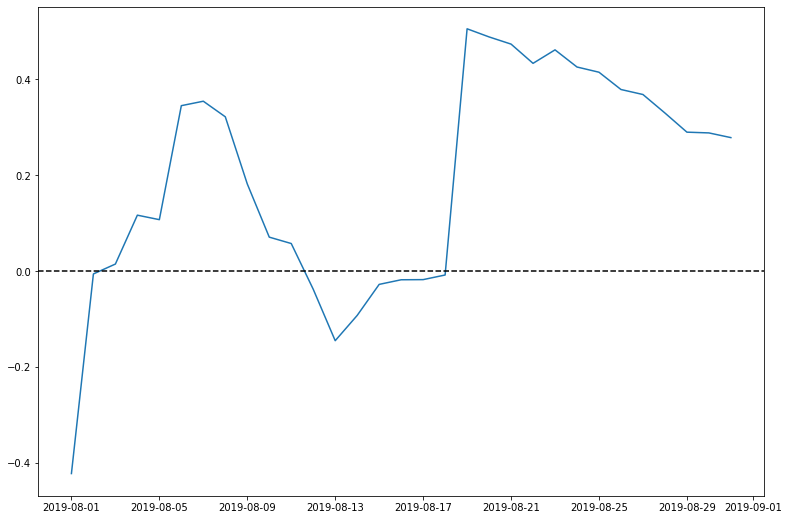

In [17]:
#merging the cumulative revenue tables into one table
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',right_on='date',how='left',suffixes=['A','B'])

plt.figure(figsize=(13,9))
#plotting relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#adding x axis to plot
plt.axhline(y=0, color='black',linestyle='--')

plt.show()

Comment:

The relative difference in cumulative average order size shows that there are outliers in the data set as it mostly above the x axis with two drastic peaks.


4.1 Calculating the conversion rates for each group as the ratio of orders to the number of visits for each day.

In [18]:
#calculating cumulative conversion
cumulativeTable['conversion'] = cumulativeTable['orders']/cumulativeTable['visits']
#selecting group A records
cumulativeTableA = cumulativeTable[cumulativeTable['group']=='A']
#selecting group B records
cumulativeTableB = cumulativeTable[cumulativeTable['group']=='B']

4.2 Plotting the daily conversion rates of the two groups.

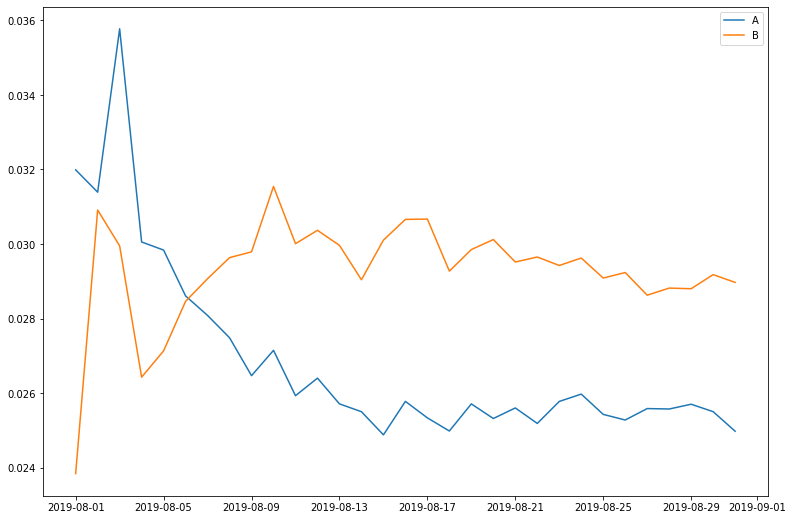

In [19]:
plt.figure(figsize=(13,9))
#plotting conversion graphs for both groups
plt.plot(cumulativeTableA['date'], cumulativeTableA['conversion'],label='A')
plt.plot(cumulativeTableB['date'], cumulativeTableB['conversion'],label='B')
plt.legend()
plt.show()

Comment:

Cumulative conversion chart converges then diverges again and remains a part with product B mostly having a higher conversion than product B and it can it assumed the graphs will stabalise this way.

5. Plotting scatter chart of the number of orders per user.

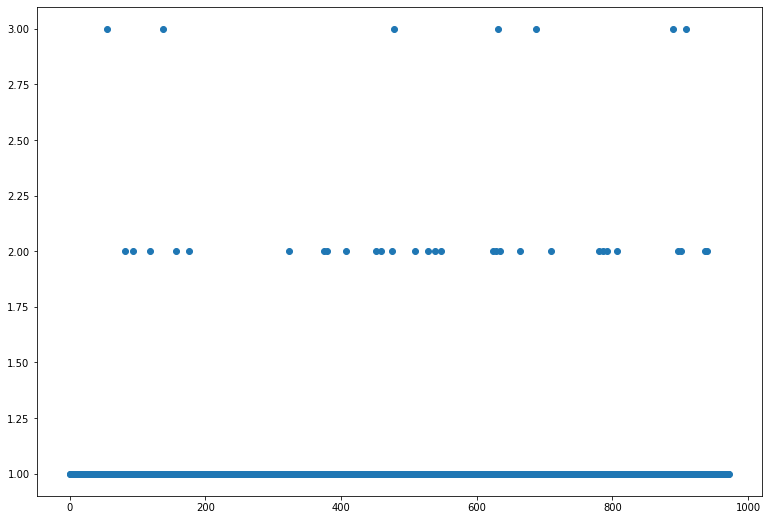

In [20]:
#creating table to group orders with unique users
ordersByUsers = (
    orders.drop(['group','revenue','date'], axis=1)
    .groupby('visitorId',as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)
#naming columns
ordersByUsers.columns = ['visitorId','orders']

plt.figure(figsize=(13,9))
#plotting scatter chart
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Comment:

Observing the graph above it is seen that most customers order 1 item. We can conclude that only a few customers order 2 or 3 items at a time.

6. Calculating the 95th and 99th percentiles for the number of orders per user.

In [21]:
print(np.percentile(ordersByUsers['orders'],[95,99]))

[1. 2.]


Comment:

95% of customers order 1 item and no more than 99% of users place more than 2 orders.

7. Plotting scatter chart of order prices.

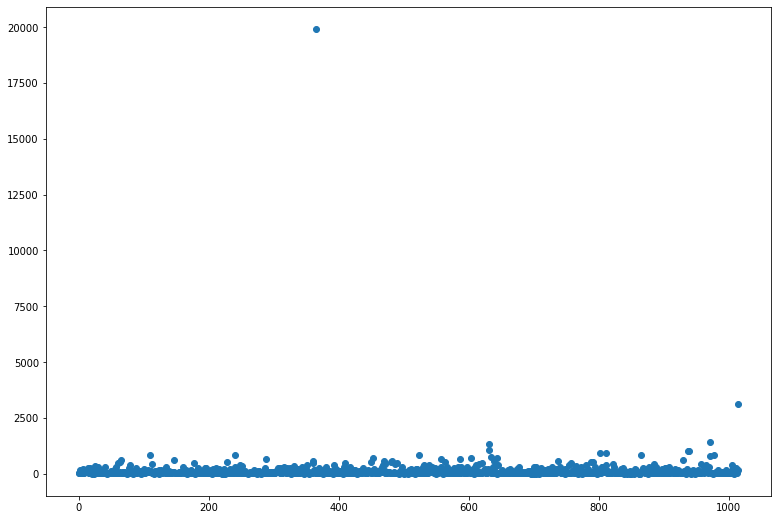

In [22]:
#plotting scatter plot
plt.figure(figsize=(13,9))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.show()

Comment: 

Observing the graph above it is seen that most order prices are below 2500, however there are 2 orders that are above 2500 and one of them is a order of around 20000. This is clearly an outlier in the data as it is the only point above the norm.

8. Calculating the 95th and 99th percentiles of order prices.

In [23]:
print(np.percentile(orders['revenue'],[95,99]))

[414.275 830.3  ]


Comment:

95% of order prices are not more than 414.275 and 99% order prrices are not more than 830.3.

9. Finding the statistical significance of the diference in conversion between the groups using the raw data.

In [24]:
#creating table to group orders with other A group users
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns = ['visitorId','orders']
#creating table to group orders with other B group users
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['visitorId','orders']

#concatinating the above tables to create tables of sample A and B
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()-len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()-len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA,sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


Comment: 

The obtained p-value is 0.011, this is less than 0.05. Impying there is a statistical significance in the raw data between groups A and B and that we reject the null hypothesis that there's no statistical signficance in conversion between the groups.

10. Finding the statistical significance of the difference in average order size between the groups using raw data.

In [25]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


Comment:

The obtained p-value is 0.862, this is significantly above 0.05. Implying there is no statistical significance in the raw data between groups A and B and that we can't reject the null hypothesis that there is a statistical significance in average order size between the groups.

11. Finding the statistical significance of the diference in conversion between the groups using the filtered data.

In [26]:
#filtering table of orders storing users with more than 1 order
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>1]['visitorId'],ordersByUsersB[ordersByUsersB['orders']>1]['visitorId']],axis=0)
#filteringtable of orders storing users with orders more than 650
usersWithExpensiveOrders = orders[orders['revenue']>650]['visitorId']
#merging anamolies
abnormalUsers = pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
#preparing samples of filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()-len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()-len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.005
0.203


Comment:

The obtained p-value is 0.05, this is equal to 0.05. Implying there is no statistical significance in the filtered data between groups A and B and that we can't reject the null hypothesis that there is a statistical significance in conversion between the groups.

12. Finding the statistical significance of the difference in average order size between the groups using filtered data.

In [27]:
print("{0:.3f}".format(st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                                       orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                       /orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

0.716
0.097


Comment:

The obtained p-value is 0.716, this is larger than 0.05. Implying there is no statistical significance in the filtered data between groups A and B and that we can't reject the null hypothesis that there is a statistical significance in average order size between the groups.

13. Making a decision based on the test results.

The facts from the above tests is that:
- The raw data had a statistical significance in conversion between the groups, however the filtered data showed no statistical significance in conversion between the two groups. The filtred data will be considered in our decision as there were outliers in our raw data.
- The raw data and filtered data showed no significant in average order size between the two groups. 

Based on the test results it is recommended to decide to: Stop the test, consider one of the groups the leader.